# Answers to Lab 2
## 90-803 Machine Learning Foundations with Python (Spring 2023)
### Author: Prof. Gongora-Svartzman
#### Date: January 27th, 2023

### Topics covered in this Lab:
- Linear regression
- Multivariate linear regression
- Polynomial regression

### Changing the author field and file name.

 (a) Change the `Author:` field above on the Jupyter Notebook to your own name.

 (b) Rename this file to "Lab2_S23_YourHameHere.ipynb", where YourNameHere is changed to your own name.


### Installing and loading packages

Before you begin this Lab make sure you have installed all the required libraries. It is suggested to use the Python or Conda environment as we have gone through in the first lab throughout the semester. Load the libraries as indicated below.

You only need to install libraries once.  Once they're installed, you may use them by **importing** the libraries using the `import` command.  For today's lab, you'll want to run the following code


In [2]:
# Packages we will need
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px

#You will need statsmodels and scikit-learn further on
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline


### Make sure to commit your work periodically!

### 1. Warm-up: Data Processing 

In this notebook we'll be working with a Bike Share Dataset. Please download the dataset from Canvas. Here's a description of the variables found in the dataset:

* **instant** - record index
* **dteday** - date
* **season** - season (1:winter, 2:spring, 3:summer, 4:fall)
* **yr** - year (0:2011, 1:2012)
* **mnth** - month (1 to 12)
* **holiday** - weather day is holiday or not (extracted from [Web Link](http://dchr.dc.gov/page/holiday-schedule))
* **weekday** - day of the week
* **workingday** - if day is neither weekend nor holiday is 1, otherwise is 0.
* **weathersit** -
   * 1: Clear, Few clouds, Partly cloudy, Partly cloudy
   * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
   * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
   * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* **temp** - Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
* **atemp**: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
* **hum** - Normalized humidity. The values are divided to 100 (max)
* **windspeed** - Normalized wind speed. The values are divided to 67 (max)
* **casual** - count of casual users
* **registered** - count of registered users
* **cnt** - count of total rental bikes including both casual and registered


This is a copy of UCI ML Bike Sharing Dataset.
https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset
     
References

   - Fanaee-T, Hadi, and Gama, Joao, 'Event labeling combining ensemble detectors and background knowledge', Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg, [Web Link](https://link.springer.com/article/10.1007/s13748-013-0040-3).


**1)a) Begin by reading the file and save it in dataframe called  `bikeSharing`. Print the first five rows of the dataframe.**

In [3]:
bikeSharing = pd.read_csv("bike_sharing_data.csv")
bikeSharing.head()

,Unnamed: 0,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,0,609.0,2012-08-31,3.0,1.0,8.0,0.0,5.0,1.0,1.0,0.764167,0.689400,0.587500,0.168533,1433.0,5917.0,7350.0
1,1,239.0,2011-08-27,3.0,0.0,8.0,0.0,6.0,0.0,2.0,0.680000,0.635556,0.850000,0.375617,226.0,889.0,1115.0
2,2,718.0,2012-12-18,4.0,1.0,12.0,0.0,2.0,1.0,1.0,0.410833,0.409708,0.666250,0.221404,433.0,5124.0,5557.0
3,3,651.0,2012-10-12,4.0,1.0,10.0,0.0,5.0,1.0,1.0,0.437500,0.433071,0.539167,0.235092,1060.0,6222.0,7282.0
4,4,119.0,2011-04-29,2.0,0.0,4.0,0.0,5.0,1.0,1.0,0.510000,0.497463,0.457083,0.240063,878.0,3717.0,4595.0


**1)b) Print out the number of rows and columns in the `bikeSharing` data.**

In [4]:
bikeSharing.shape

(751, 17)

**1)c) Are there any missing values in the dataset? Print the data types for each column in the dataframe and then the number of missing values per column in the second cell (given below). How many rows contain missing values? Handle null values as needed.**

In [5]:
bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751 entries, 0 to 750
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  751 non-null    int64  
 1   instant     751 non-null    float64
 2   dteday      749 non-null    object 
 3   season      751 non-null    float64
 4   yr          748 non-null    float64
 5   mnth        750 non-null    float64
 6   holiday     749 non-null    float64
 7   weekday     751 non-null    float64
 8   workingday  750 non-null    float64
 9   weathersit  749 non-null    float64
 10  temp        749 non-null    float64
 11  atemp       751 non-null    float64
 12  hum         750 non-null    float64
 13  windspeed   749 non-null    float64
 14  casual      750 non-null    float64
 15  registered  750 non-null    float64
 16  cnt         751 non-null    float64
dtypes: float64(15), int64(1), object(1)
memory usage: 99.9+ KB


In [6]:
bikeSharing.isnull().sum(axis=0)

Unnamed: 0    0
instant       0
dteday        2
season        0
yr            3
mnth          1
holiday       2
weekday       0
workingday    1
weathersit    2
temp          2
atemp         0
hum           1
windspeed     2
casual        1
registered    1
cnt           0
dtype: int64

--> your answer here
There are 1-3 values missing from several columns

**1)d) Since the number of missing values is low in this case you can proceed to drop all missing values.**

In [8]:
bikeSharing = bikeSharing.dropna(axis=0)
bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 739 entries, 0 to 750
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  739 non-null    int64  
 1   instant     739 non-null    float64
 2   dteday      739 non-null    object 
 3   season      739 non-null    float64
 4   yr          739 non-null    float64
 5   mnth        739 non-null    float64
 6   holiday     739 non-null    float64
 7   weekday     739 non-null    float64
 8   workingday  739 non-null    float64
 9   weathersit  739 non-null    float64
 10  temp        739 non-null    float64
 11  atemp       739 non-null    float64
 12  hum         739 non-null    float64
 13  windspeed   739 non-null    float64
 14  casual      739 non-null    float64
 15  registered  739 non-null    float64
 16  cnt         739 non-null    float64
dtypes: float64(15), int64(1), object(1)
memory usage: 103.9+ KB


**1)e) By inspecting the features (columns), you can realize that the first two columns (`instant` and `Unnamed: 0`) bring no value to your future analysis. Drop those columns.**

In [9]:
bikeSharing = bikeSharing.drop(['instant','Unnamed: 0'], axis=1)
bikeSharing.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2012-08-31,3.0,1.0,8.0,0.0,5.0,1.0,1.0,0.764167,0.689400,0.587500,0.168533,1433.0,5917.0,7350.0
1,2011-08-27,3.0,0.0,8.0,0.0,6.0,0.0,2.0,0.680000,0.635556,0.850000,0.375617,226.0,889.0,1115.0
2,2012-12-18,4.0,1.0,12.0,0.0,2.0,1.0,1.0,0.410833,0.409708,0.666250,0.221404,433.0,5124.0,5557.0
3,2012-10-12,4.0,1.0,10.0,0.0,5.0,1.0,1.0,0.437500,0.433071,0.539167,0.235092,1060.0,6222.0,7282.0
4,2011-04-29,2.0,0.0,4.0,0.0,5.0,1.0,1.0,0.510000,0.497463,0.457083,0.240063,878.0,3717.0,4595.0


**1)f) Compute a correlation matrix for all variables. You can use [corr()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) in pandas to calculate the correlation for your dataframe and a [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) in Seaborn to plot it. Name two variable with the highest positive correlation and two variables with the lowest negative correlation.**

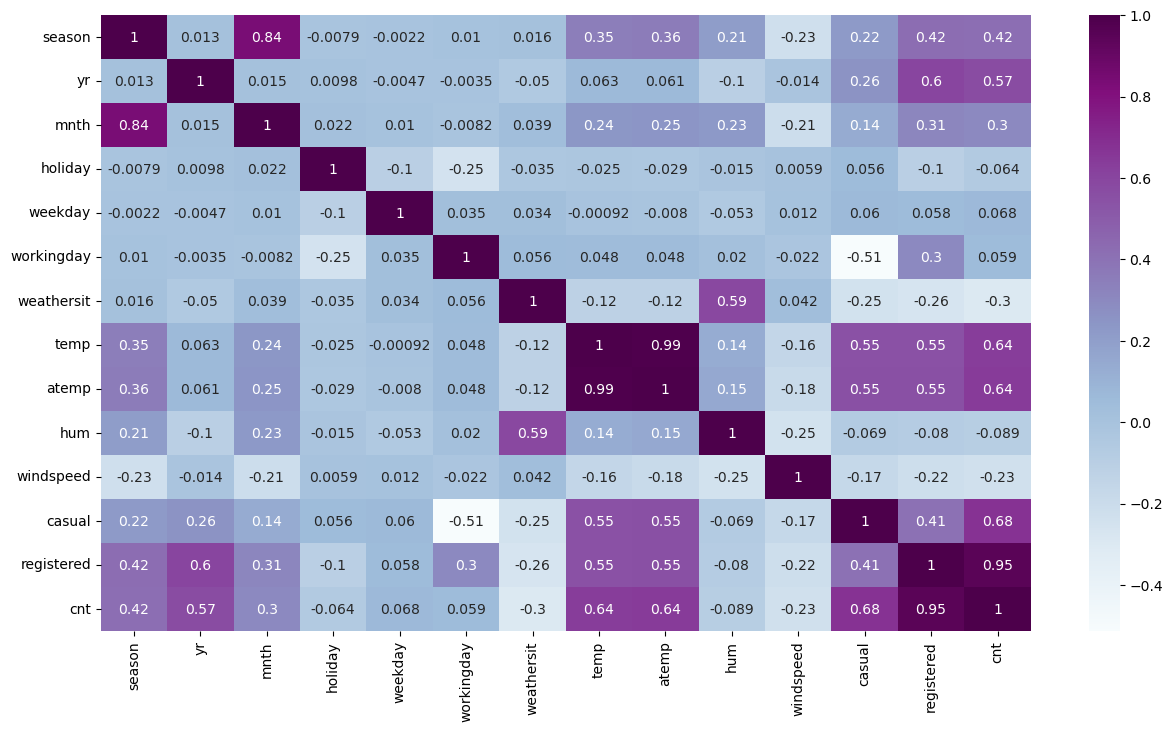

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(bikeSharing.loc[:, bikeSharing.columns!='dteday'].corr(), annot=True, cmap="BuPu")
plt.show()

- Highest possitive correlation: registered-cnt, atemp-temp, mnth-season
- Lowest Negative correlation: casual-workingday, workingday-holiday, windspeed-hum   

**1)g) Compute a [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) in Seaborn. Briefly explain why this plot is useful, and how it differs from a corelation plot.**

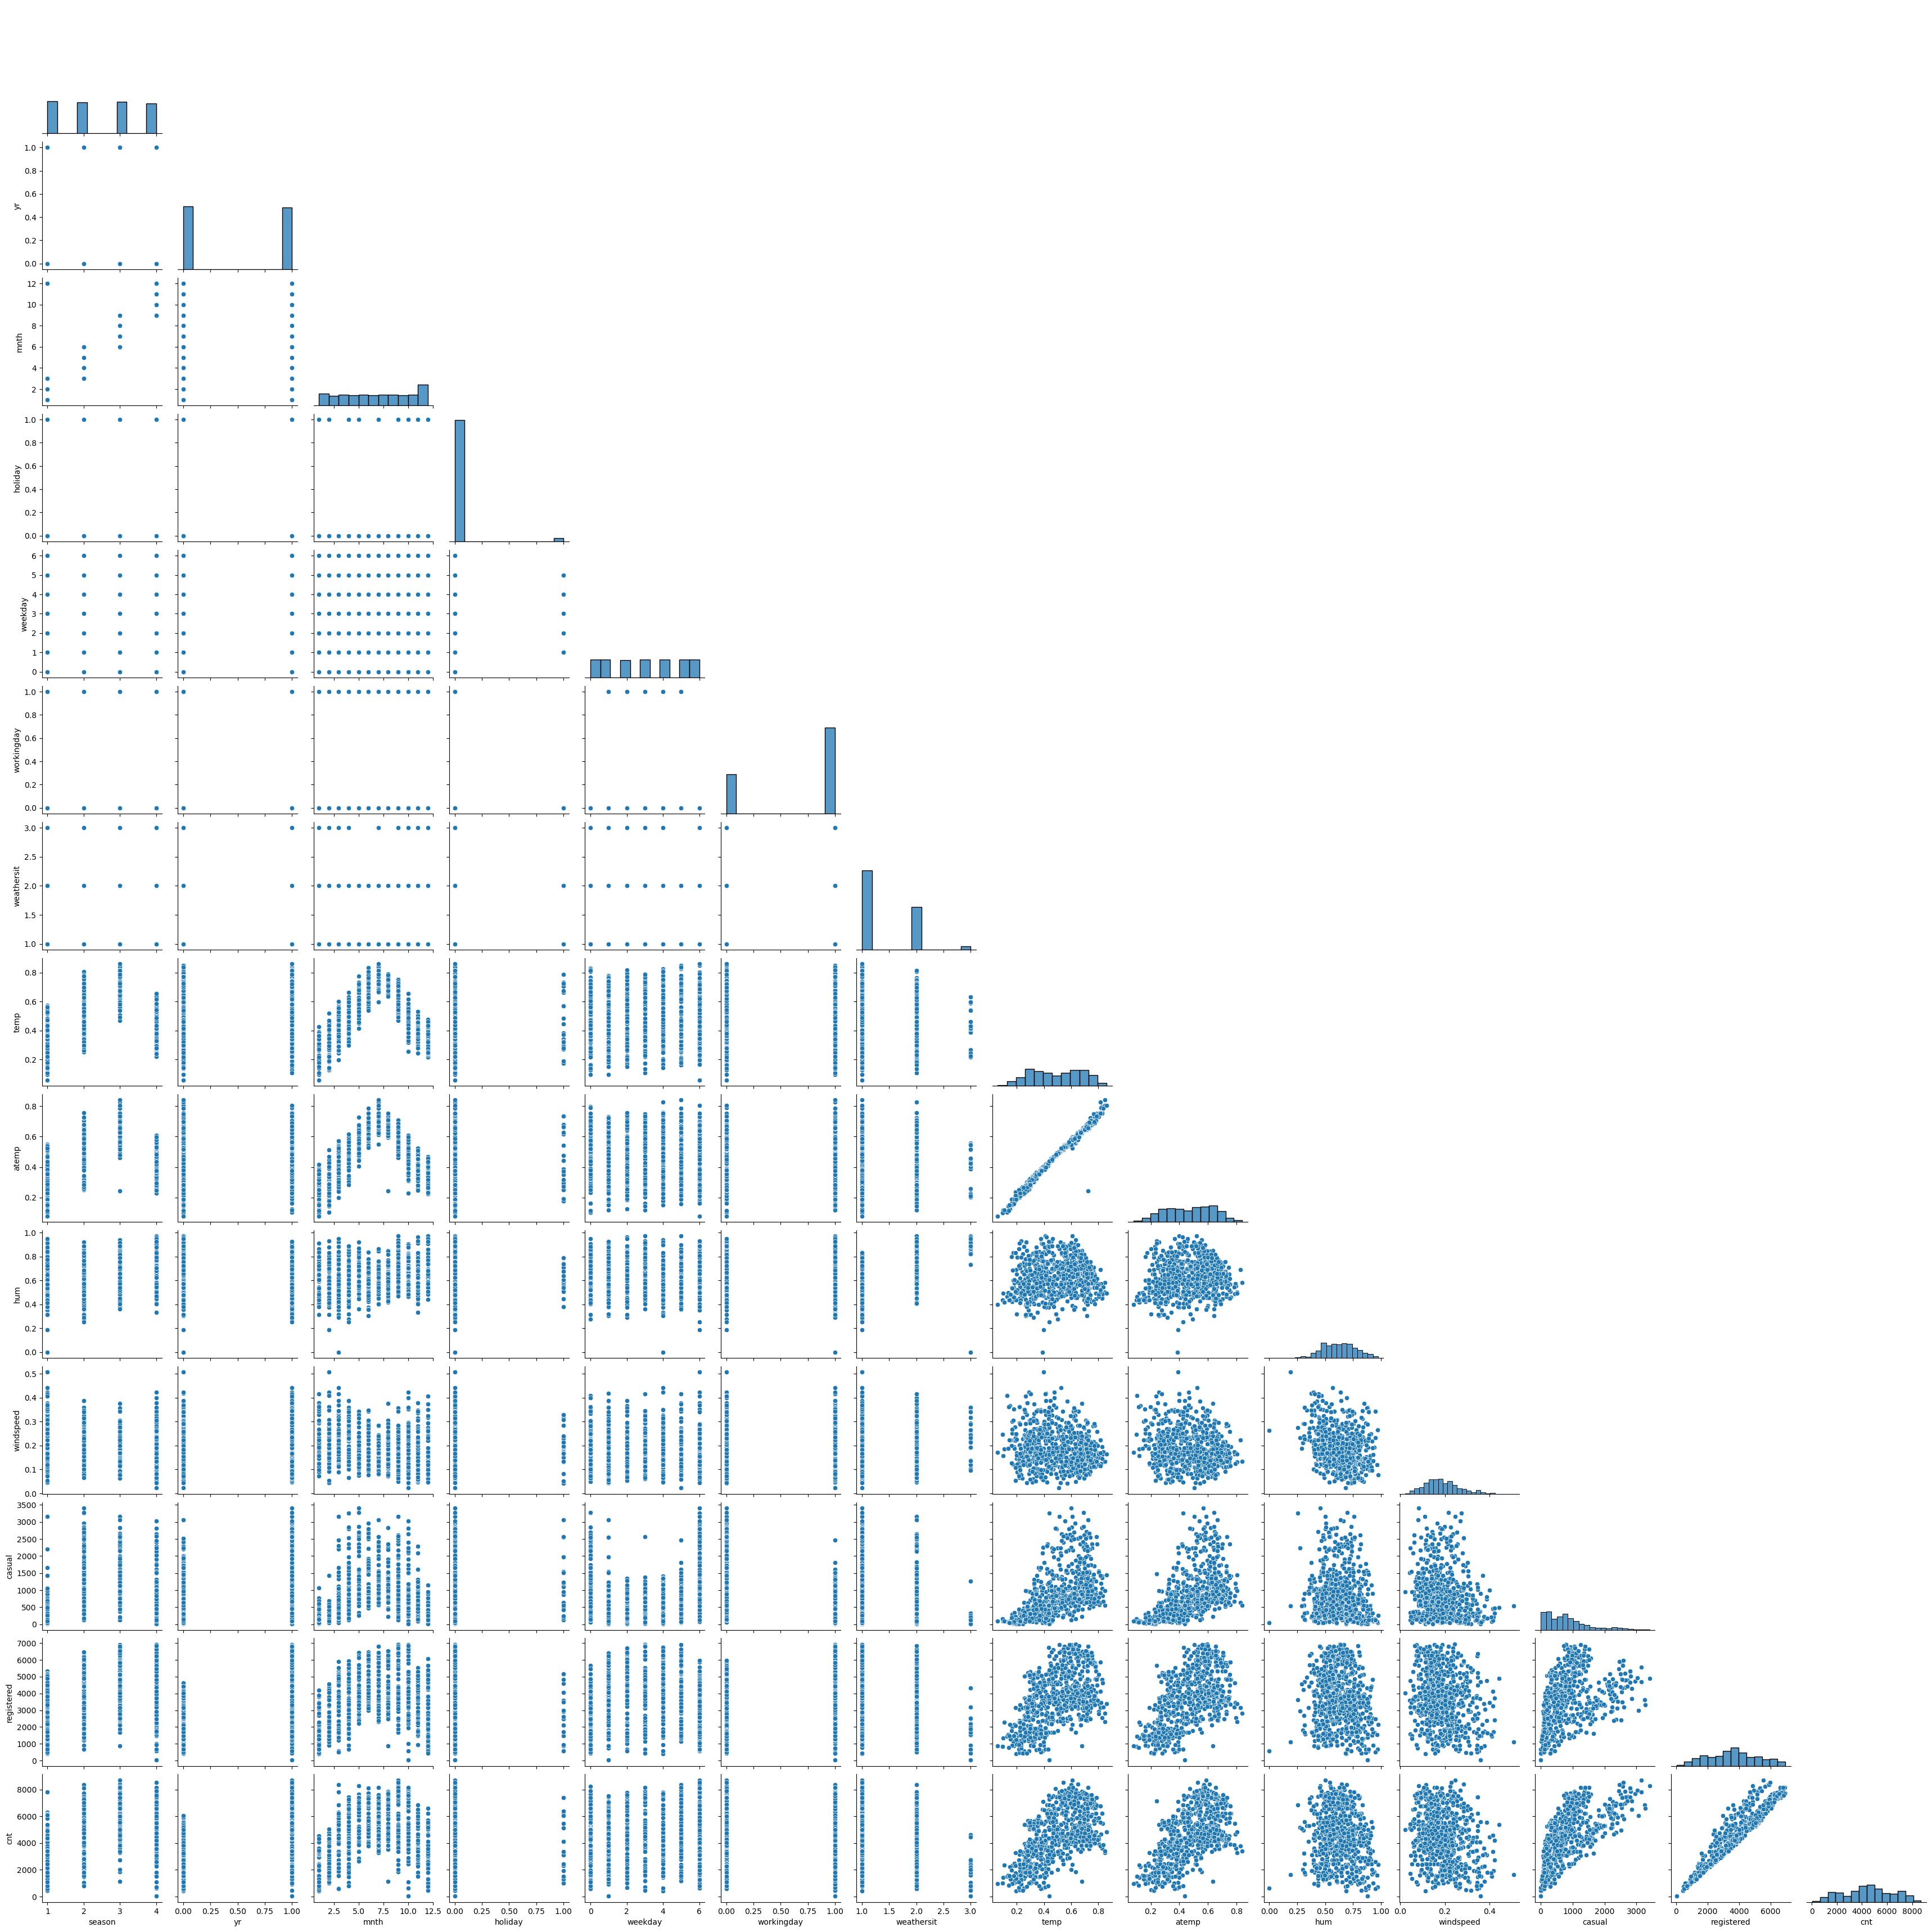

In [12]:
sns.pairplot(bikeSharing, corner=True)
plt.show()

---> your answer here

Both plots show the relationships between variables. Correlation coefficient values are between -1 and +1, where a +1 indicate a strong/perfect, positive correlation, while a -1 indicate a strong negative correlation. This relationship is linear. A value of 0 in the correlation coefficient indicates no correlation at all between variables. Be careful, correlation does not imply causation! 

### Make sure to commit your work periodically!

### 2. Linear Regression

**To model a linear regression out of this data we will need additional libraries. The main libraries we will be using are [`statsmodels`](https://www.statsmodels.org/stable/index.html) and [`sckit-learn`](https://scikit-learn.org/stable/).** 

We will also need to visualize our regression models, therefore we will import seaborn and pyplot as well. You probably have some experience creating visualizations with these libraries.


We will first be using `statsmodels` and a [formula notation](https://www.statsmodels.org/dev/example_formulas.html). This is an easier first approach. Look at the example below to see how this works for linear regressions.

> `linear_regression_model = smf.ols('Y ~ X', dataset).fit()`

**2)a) Use the `smf.ols()` function to a fit linear regression of `cnt` on `mnth`.  Save the output of your linear regression in a variable called `lm`. The line below is already setup for you, just make sure to run it.**


In [13]:
lm = smf.ols('cnt ~ mnth', bikeSharing).fit()

**2)b) Use the `summary()` function on your `lm` variable to get a print-out of your regression results**



In [14]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     72.73
Date:                Sun, 22 Jan 2023   Prob (F-statistic):           8.38e-17
Time:                        22:30:57   Log-Likelihood:                -6613.4
No. Observations:                 739   AIC:                         1.323e+04
Df Residuals:                     737   BIC:                         1.324e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3382.9615    144.786     23.365      0.000    3098.718    3667.205
mnth         168.3005     19.734      8.528      0.000     129.559     207.042
==============================================================================
Omnibus:                       34.211   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.467
Skew:                          -0.021   Prob(JB):                     0.000722
Kurtosis:                       2.316   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**2)c) Uncomment the line below to get a nice printout of the coefficients table**


In [15]:
results_reg = pd.read_html(lm.summary().tables[1].as_html(), header=0, index_col=0)[0]
print(results_reg)

                coef  std err       t  P>|t|    [0.025    0.975]
Intercept  3382.9615  144.786  23.365    0.0  3098.718  3667.205
mnth        168.3005   19.734   8.528    0.0   129.559   207.042


**2)d)  Call `params` on `lm` to explore what values this linear model contains. What is the estimated intercept?  What is the coefficient of `mnth` in the model?  Interpret this coefficient.**

In [16]:
lm.params

Intercept    3382.961472
mnth          168.300476
dtype: float64

---> your answer here

The intercept is 3382.96, this is where our linear regression model crosses the y-axis.

mnth coefficient is 168.30 and is indicating the inclination of the line. This line is positive, due to a positive relationship between atemp and cnt.

cnt = 3382.96 + 168.30(mnth)

This means that as the month (mnth) increases, the number of total rental bikes also increases. 

### Make sure to commit your work periodically!

### 3. Plotting our Regression Model

Seaborn can plot the predictions produced by our fitted model (previous questions) or we can use [regplot()](https://seaborn.pydata.org/generated/seaborn.regplot.html) to fit a linear regression on the data provided.

**3)a) Use seaborn to overlay a linear regression line (with `regplot()`) on a `scatterplot` of `mnth` vs. `cnt`.  Edit the `xlab` and `ylab` arguments to produce more meaningful axis labels.  Does the linear model appear to fit the data well?  Explain.**



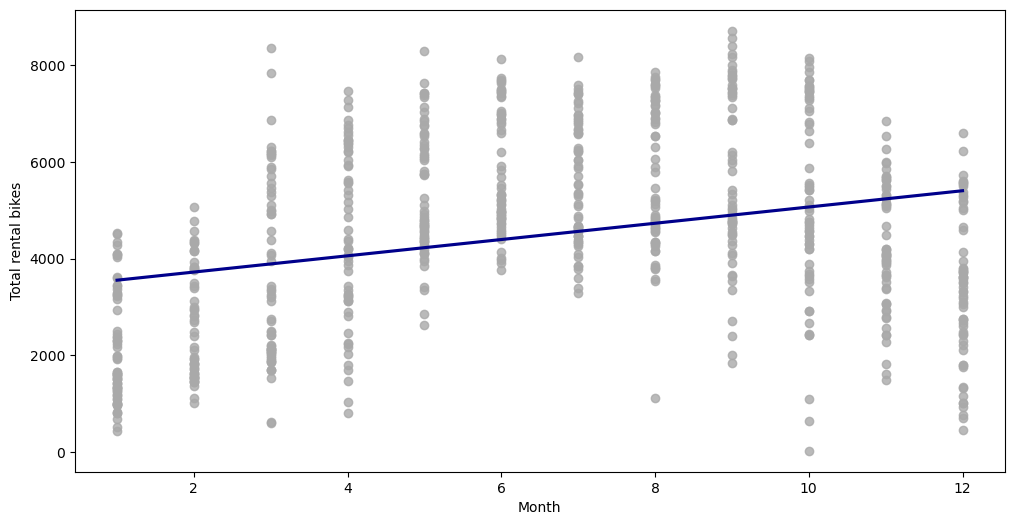

In [17]:
sns.axes_style("whitegrid") 
plt.figure(figsize=(12,6))
lmplot = sns.regplot(x="mnth", y="cnt", data=bikeSharing, ci=None, order=1, 
            scatter_kws={"color": "darkgrey"}, line_kws={"color": "darkblue"})
lmplot.set(xlabel='Month', 
           ylabel='Total rental bikes')
plt.show(lmplot)

---> your answer here

- The linear model appears to be a pretty good fit to the data in the `mnth` range of 1 - 4.  However, the overall relationship between month and total rental bikes appears to be overall non-linear.  

- Here's a plot showing a local regression fit to the data. The local regression model appears to do a better job of capturing the trends in the data.

### Make sure to commit your work periodically!

### 4. Multivariate Linear Regression

For this section of the Lab we will incorporate more variable into our model.

**4)a) Use the `smf.ols()` command to a fit a linear regression of `cnt` on `mnth` and `atemp`.  Save your regression model in a variable called `lm2`.**


Take a look at the [formula notation](https://www.statsmodels.org/dev/example_formulas.html) in statsmodels.

> `linear_regression_model = smf.ols('Y ~ X1 + X2', dataset).fit()`


In [17]:
lm2 = smf.ols('cnt ~ mnth + atemp', bikeSharing).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     278.6
Date:                Sun, 22 Jan 2023   Prob (F-statistic):           8.38e-91
Time:                        22:33:51   Log-Likelihood:                -6439.9
No. Observations:                 739   AIC:                         1.289e+04
Df Residuals:                     736   BIC:                         1.290e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    539.4428    177.373      3.041      0.002     191.226     887.660
mnth          84.7289     16.115      5.258      0.000      53.092     116.366
atemp       7172.9289    341.568     21.000      0.000    6502.365    7843.492
==============================================================================
Omnibus:                        8.669   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                5.956
Skew:                           0.069   Prob(JB):                       0.0509
Kurtosis:                       2.583   Cond. No.                         50.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Understanding a few of the values given by the summary table:**

* R-squared (coefficient of determination) - the strength of the relationship between the model and the dependent variables. This measures the model's quality, meaning the closer this number is to 1.0 the better the model is. Statistically speaking, R-squared is equivalent to the fraction of the variance of *y* that can be explained by the regression model. For example, if R<sup>2</sup> is 0.95, it means that 95% of the variance of *y* can be explained by the model, and the other 5% is unexplained (e.g. sample variability).

* R<sup>2</sup> adjusted - is even better because it accounts for the number of variables in the model, aka it is more realistic.

* F statistic - model is significant or insignificant. It is mostly used for models that use least squares for fitting (or some variance of least squares).

* p-value - if this value is < 0.05 it indicates that the model is statistically significant (falls in a 95% confidence interval). 

**4)b) What is the coefficient of `atemp` in your model? Interpret this coefficient.**

In [19]:
print('Parameters:')
print(lm2.params)
print('Atemp: ', lm.params.atemp)

Parameters:
Intercept     539.442776
mnth           84.728927
atemp        7172.928911
dtype: float64
Atemp:  7172.928910882387


---> you answer here

The coefficient of atemp is 7172.93. This is the normalized feeling temperature, positively relative to the total rental bikes. Notice that adding atemp makes mnth coefficient decreased.

### Make sure to commit your work periodically!

### 5. Polynomial Regression

For polynomial regressions, it will be easier if we import PolynomialFeatures from sklearn. These will still work with our statsmodels library.

In [18]:
#make sure you have scikit-learn before running this line
from sklearn.preprocessing import PolynomialFeatures

**5)a) For your first polynomial regression do `cnt ~ mnth`, with a `degree=3`. The first step is to transform the X values into polynomial form. Take a look at the instructions below.**

``` 
#instantiate your object `PolynomialFeatures()`. You should initialize it with degree=3 in this case
polynomial_features= PolynomialFeatures(degree=3)

# fit and transform your X values (giving you X, X^2 and X^3) 
xp = polynomial_features.fit_transform(X.values.reshape(-1, 1))

#fit your model (same Y, transformed X)
model = sm.OLS(Y,xp).fit()

#print the summary of your model
model.summary()

```

In [23]:
#instantiate your object 
polynomial_features= PolynomialFeatures(degree=3)
xp = polynomial_features.fit_transform(bikeSharing["mnth"].values.reshape(-1, 1))

model = sm.OLS(bikeSharing['cnt'], xp).fit()
#ypred = model.predict(xp) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     162.6
Date:                Sun, 22 Jan 2023   Prob (F-statistic):           8.02e-81
Time:                        22:47:59   Log-Likelihood:                -6460.1
No. Observations:                 739   AIC:                         1.293e+04
Df Residuals:                     735   BIC:                         1.295e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        899.1506    304.192      2.956      0.003     301.961    1496.340
x1          1070.2165    197.657      5.415      0.000     682.178    1458.255
x2           -25.9417     34.900     -0.743      0.458     -94.457      42.574
x3            -3.8611      1.777     -2.173      0.030      -7.350      -0.373
==============================================================================
Omnibus:                       11.421   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                6.941
Skew:                           0.014   Prob(JB):                       0.0311
Kurtosis:                       2.526   Cond. No.                     4.81e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**5)b) Draw a polynomial regression, degree = 3, for cnt ~ mnth. Use Seaborn's `regplot` for this.**

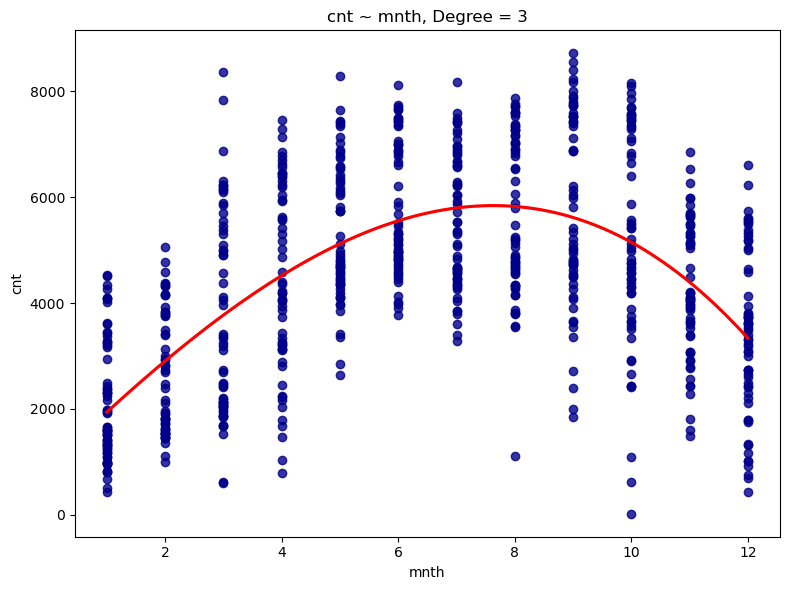

In [21]:
x = bikeSharing['mnth']
y = bikeSharing['cnt']

degree=3
plt.figure(figsize=(8,6))
sns.regplot(x=x,y=y, ci=None, label=('Degree '+str(degree)), order=degree, 
            scatter_kws={"color": "darkblue"}, line_kws={"color": "red"})
plt.title("cnt ~ mnth, Degree = "+str(degree))
plt.tight_layout()
plt.show()

**5)c) From class lecture we saw that a measure (for now) to evaluate how good is our model is R-squared. Use the previous model to print out the R-squared and adjusted R-squared for your model. Do these two values differ? And how good is your model?**

*Hint: You can access the Adjusted R-squared through a polynomial model (model.rsquared_adj)*

In [24]:
x = bikeSharing['mnth']
y = bikeSharing['cnt']
degree=3

polynomial_features= PolynomialFeatures(degree=degree)
xp = polynomial_features.fit_transform(x.values.reshape(-1, 1))
model = sm.OLS(y, xp).fit()

print("R-squared",model.rsquared)
print("Adjusted R-squared",model.rsquared_adj)


R-squared 0.3988831087142022
Adjusted R-squared 0.39642957038242344


---> your answer here

Both values differ slightly (in decimals) but are essentially around 0.39. This is a reasonable model (above 0.5, which would be a coin flip) but there is a percetage of unexplained variance. This model could be improved.

## END OF LAB !

* Make sure to merge any branches into main (or master)
* Push your commits to your remote repo on GitHub
* Go into Gradescope and submit your repo